In [1]:
#Import necessary libraries/packages

import pandas as pd, plotly.express as px, regex as re, seaborn as sea, warnings
from matplotlib import pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Read in Philly Crime csv

crime = pd.read_csv('crime.csv')

Take a look at the data

In [4]:
crime.columns

Index(['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code', 'Police_Districts', 'Month', 'Lon', 'Lat'],
      dtype='object')

In [5]:
crime.head(10)

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532
5,17,1,2015-04-25 12:50:00,2015-04-25,12:50:00,12,201517017705,800 BLOCK S BROAD ST,600.0,Thefts,13.0,2015-04,-75.166412,39.940070
6,23,K,2009-02-10 14:33:00,2009-02-10,14:33:00,14,200923006310,2200 BLOCK RIDGE AVE,800.0,Other Assaults,16.0,2009-02,-75.171149,39.979586
7,77,A,2009-04-02 18:30:00,2009-04-02,18:30:00,18,200977001770,TERMINAL A W,500.0,Burglary Non-Residential,NaN,2009-04,NaN,NaN
8,35,D,2009-03-18 01:14:00,2009-03-18,01:14:00,1,200935021299,N 5TH SOMMERVILLE,2600.0,All Other Offenses,NaN,2009-03,NaN,NaN
9,23,L,2009-06-14 20:30:00,2009-06-14,20:30:00,20,200923029129,N 2828 W MASTER STST,2600.0,All Other Offenses,NaN,2009-06,NaN,NaN


In [6]:
crime.shape

(2237605, 14)

In [7]:
crime.describe()

,Dc_Dist,Hour,Dc_Key,UCR_General,Police_Districts,Lon,Lat
count,2.237605e+06,2.237605e+06,2.237605e+06,2.236942e+06,2.217675e+06,2.220256e+06,2.220256e+06
mean,1.726837e+01,1.315990e+01,2.010975e+11,1.271354e+03,1.206404e+01,-7.514992e+01,3.999201e+01
std,1.064898e+01,6.799952e+00,3.234684e+08,8.143510e+02,5.792056e+00,5.973890e-02,4.534823e-02
min,1.000000e+00,0.000000e+00,1.998121e+11,1.000000e+02,1.000000e+00,-7.527773e+01,3.986999e+01
25%,9.000000e+00,9.000000e+00,2.008151e+11,6.000000e+02,8.000000e+00,-7.518490e+01,3.995571e+01
50%,1.600000e+01,1.400000e+01,2.011060e+11,8.000000e+02,1.200000e+01,-7.515668e+01,3.999105e+01
75%,2.400000e+01,1.900000e+01,2.014021e+11,1.800000e+03,1.700000e+01,-7.511844e+01,4.002739e+01
max,9.200000e+01,2.300000e+01,2.017770e+11,2.600000e+03,2.200000e+01,-7.495750e+01,4.013790e+01


In [8]:
crime.dtypes

Dc_Dist                 int64
Psa                    object
Dispatch_Date_Time     object
Dispatch_Date          object
Dispatch_Time          object
Hour                    int64
Dc_Key                  int64
Location_Block         object
UCR_General           float64
Text_General_Code      object
Police_Districts      float64
Month                  object
Lon                   float64
Lat                   float64
dtype: object

In [9]:
#Keep only the columns we want to use for analysis

crime = crime[['Dc_Dist','Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Location_Block',
       'Text_General_Code', 'Month', 'Lon', 'Lat']].copy()

In [10]:
#Also check for null values to get a sense of what data is missing and how that may impact results.
crime.isna().sum()

Dc_Dist                  0
Dispatch_Date            0
Dispatch_Time            0
Hour                     0
Location_Block           0
Text_General_Code      663
Month                    0
Lon                  17349
Lat                  17349
dtype: int64

In [11]:
crime.head(5)

,Dc_Dist,Dispatch_Date,Dispatch_Time,Hour,Location_Block,Text_General_Code,Month,Lon,Lat
0,18,2009-10-02,14:24:00,14,S 38TH ST / MARKETUT ST,Other Assaults,2009-10,NaN,NaN
1,14,2009-05-10,00:55:00,0,8500 BLOCK MITCH,All Other Offenses,2009-05,NaN,NaN
2,25,2009-08-07,15:40:00,15,6TH CAMBRIA,Other Assaults,2009-08,NaN,NaN
3,35,2009-07-19,01:09:00,1,5500 BLOCK N 5TH ST,Weapon Violations,2009-07,-75.130477,40.036389
4,9,2009-06-25,00:14:00,0,1800 BLOCK WYLIE ST,All Other Offenses,2009-06,-75.166350,39.969532


In [12]:
crime.rename(columns={'Text_General_Code':'Crime_Description', 'Location_Block':'Location_of_Crime'},inplace=True)

In [13]:
crime['Year'] = pd.to_datetime(crime['Dispatch_Date']).dt.year
crime['Month']= pd.to_datetime(crime['Dispatch_Date']).dt.month

In [15]:
crime.loc[crime.duplicated()]

,Dc_Dist,Dispatch_Date,Dispatch_Time,Hour,Location_of_Crime,Crime_Description,Month,Lon,Lat,Year
2742,35,2009-09-07,00:18:00,0,5200 BLOCK N 3RD ST,All Other Offenses,9,-75.129024,40.030000,2009
2744,35,2009-09-07,00:18:00,0,300 BLOCK W WELLENS ST,All Other Offenses,9,-75.128850,40.030951,2009
2752,22,2009-12-28,00:31:00,0,N UBER ST / W SUSQUEHANNA AV,All Other Offenses,12,-75.164979,39.987430,2009
2754,22,2009-12-28,00:55:00,0,N UBER ST / W SUSQUEHANNA AV,All Other Offenses,12,-75.164979,39.987430,2009
2755,22,2009-12-28,00:55:00,0,N UBER ST / W SUSQUEHANNA AV,All Other Offenses,12,-75.164979,39.987430,2009
...,...,...,...,...,...,...,...,...,...,...
2237493,12,2017-01-08,01:40:00,1,7200 BLOCK ELMWOOD AV,All Other Offenses,1,-75.240354,39.915109,2017
2237494,12,2017-01-08,02:21:00,2,6600 BLOCK WOODLAND AV,All Other Offenses,1,-75.235552,39.924668,2017
2237554,25,2017-01-17,12:14:00,12,100 BLOCK W TUSCULUM ST,All Other Offenses,1,-75.130036,39.995120,2017
2237598,18,2017-01-17,22:11:00,22,4000 BLOCK MARKET,All Other Offenses,1,-75.201956,39.957158,2017


In [16]:
new_crime = crime.loc[~crime.duplicated(subset=['Dispatch_Date','Dispatch_Time','Location_of_Crime','Crime_Description'])]\
.reset_index(drop=True)

In [17]:
new_crime.shape

(2150943, 10)

In [18]:
new_crime.loc[new_crime.duplicated()]

,Dc_Dist,Dispatch_Date,Dispatch_Time,Hour,Location_of_Crime,Crime_Description,Month,Lon,Lat,Year


In [19]:
crimes = new_crime.loc[new_crime['Year']< 2017]

In [20]:
crimes

,Dc_Dist,Dispatch_Date,Dispatch_Time,Hour,Location_of_Crime,Crime_Description,Month,Lon,Lat,Year
0,18,2009-10-02,14:24:00,14,S 38TH ST / MARKETUT ST,Other Assaults,10,NaN,NaN,2009
1,14,2009-05-10,00:55:00,0,8500 BLOCK MITCH,All Other Offenses,5,NaN,NaN,2009
2,25,2009-08-07,15:40:00,15,6TH CAMBRIA,Other Assaults,8,NaN,NaN,2009
3,35,2009-07-19,01:09:00,1,5500 BLOCK N 5TH ST,Weapon Violations,7,-75.130477,40.036389,2009
4,9,2009-06-25,00:14:00,0,1800 BLOCK WYLIE ST,All Other Offenses,6,-75.166350,39.969532,2009
...,...,...,...,...,...,...,...,...,...,...
2150758,25,2016-12-28,20:24:00,20,200 BLOCK W LEHIGH AVE,Narcotic / Drug Law Violations,12,-75.134880,39.991461,2016
2150759,19,2016-12-28,15:54:00,15,5300 BLOCK GAINOR RD,Fraud,12,-75.230457,39.989421,2016
2150760,77,2016-12-28,18:48:00,18,0 BLOCK PIA WAY,Fraud,12,-75.232354,39.883546,2016
2150761,9,2016-12-28,10:14:00,10,1600 BLOCK MARKET ST,Forgery and Counterfeiting,12,-75.168407,39.952938,2016


Text(0, 0.5, 'Types of Crime')

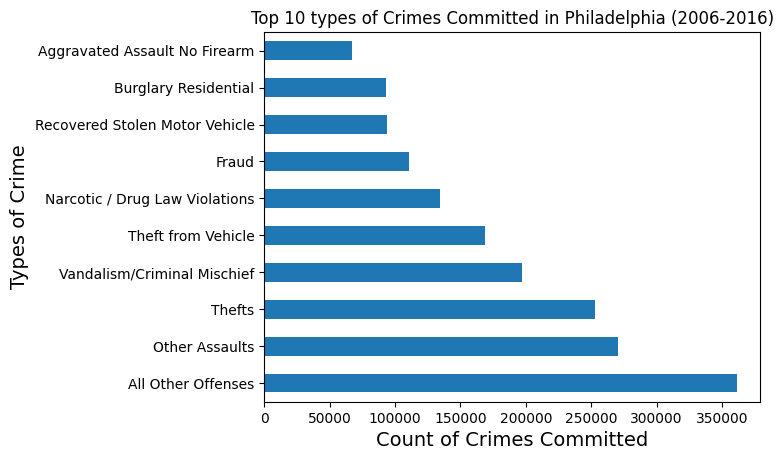

In [29]:
chart = crimes['Crime_Description'].value_counts()\
.head(10).plot(kind='barh', title='Top 10 types of Crimes Committed in Philadelphia (2006-2016)')
chart.set_xlabel('Count of Crimes Committed', fontsize=14)
chart.set_ylabel('Types of Crime', fontsize=14)

In [23]:
#crimes['Crime_Description'].value_counts()

In [ ]:
#help(crime.plot)

<Axes: xlabel='Year'>

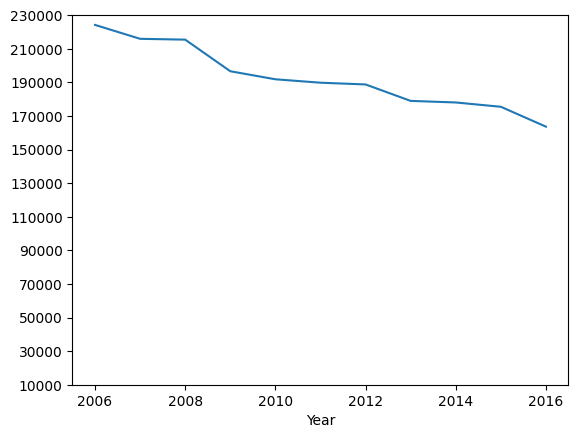

In [30]:
crimes['Year'].value_counts().plot(kind='line',yticks=range(10000,250000,20000))

Text(0.5, 0, 'Hour of the Day')

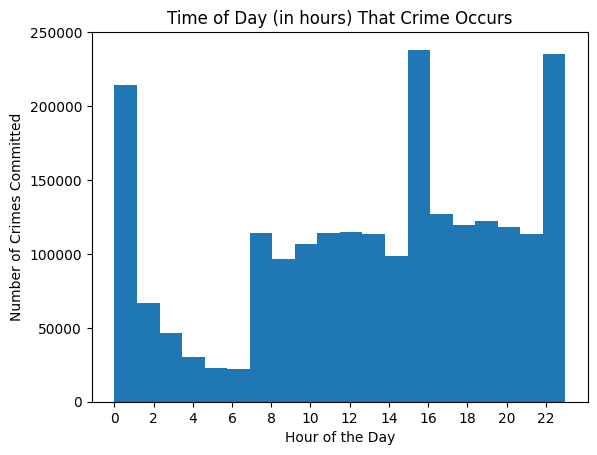

In [31]:
crimes2=crime['Hour'].plot(kind='hist',bins=20,xticks=range(0,24,2),
                                              title='Time of Day (in hours) That Crime Occurs')
crimes2.set_ylabel('Number of Crimes Committed')
crimes2.set_xlabel('Hour of the Day')

In [ ]:
#crime.value_counts('Crime_Description')

note value_counts.sort_index()

In [25]:
spec_crime= crime.query('Crime_Description != "All Other Offenses" and Crime_Description !="Other Assaults"')

In [26]:
spec_crime.shape

(1522692, 10)

In [27]:
top10=spec_crime['Crime_Description'].value_counts().head(20)
topcrime = [i.title() for i in top10.index if i]

In [28]:
topcrime

['Thefts',
 'Vandalism/Criminal Mischief',
 'Theft From Vehicle',
 'Narcotic / Drug Law Violations',
 'Fraud',
 'Recovered Stolen Motor Vehicle',
 'Burglary Residential',
 'Aggravated Assault No Firearm',
 'Driving Under The Influence',
 'Robbery No Firearm',
 'Motor Vehicle Theft',
 'Robbery Firearm',
 'Disorderly Conduct',
 'Aggravated Assault Firearm',
 'Burglary Non-Residential',
 'Weapon Violations',
 'Other Sex Offenses (Not Commercialized)',
 'Prostitution And Commercialized Vice',
 'Rape',
 'Vagrancy/Loitering']

In [29]:
topcrimes = crimes[crimes['Crime_Description'].isin(topcrime)]

In [30]:
topcrimes.shape

(1223572, 10)

In [31]:
topcrimes['Crime_Description'].value_counts()

Crime_Description
Thefts                                     252943
Vandalism/Criminal Mischief                196938
Narcotic / Drug Law Violations             134084
Fraud                                      111037
Recovered Stolen Motor Vehicle              93675
Burglary Residential                        93035
Aggravated Assault No Firearm               66945
Robbery No Firearm                          51200
Motor Vehicle Theft                         45978
Robbery Firearm                             39946
Disorderly Conduct                          38034
Aggravated Assault Firearm                  26414
Burglary Non-Residential                    22024
Weapon Violations                           18570
Other Sex Offenses (Not Commercialized)     14888
Rape                                        11584
Vagrancy/Loitering                           6277
Name: count, dtype: int64

In [32]:
#crime.dropna(axis=0, subset=['Lat','Lon'], inplace=True)
order = topcrimes['Crime_Description'].value_counts().index
orders = [i for i in order if i]

In [33]:
orders

['Thefts',
 'Vandalism/Criminal Mischief',
 'Narcotic / Drug Law Violations',
 'Fraud',
 'Recovered Stolen Motor Vehicle',
 'Burglary Residential',
 'Aggravated Assault No Firearm',
 'Robbery No Firearm',
 'Motor Vehicle Theft',
 'Robbery Firearm',
 'Disorderly Conduct',
 'Aggravated Assault Firearm',
 'Burglary Non-Residential',
 'Weapon Violations',
 'Other Sex Offenses (Not Commercialized)',
 'Rape',
 'Vagrancy/Loitering']

In [34]:
#rearrange the order so that the top crimes will be the last 'layer'
x = orders[::-1]
x

['Vagrancy/Loitering',
 'Rape',
 'Other Sex Offenses (Not Commercialized)',
 'Weapon Violations',
 'Burglary Non-Residential',
 'Aggravated Assault Firearm',
 'Disorderly Conduct',
 'Robbery Firearm',
 'Motor Vehicle Theft',
 'Robbery No Firearm',
 'Aggravated Assault No Firearm',
 'Burglary Residential',
 'Recovered Stolen Motor Vehicle',
 'Fraud',
 'Narcotic / Drug Law Violations',
 'Vandalism/Criminal Mischief',
 'Thefts']

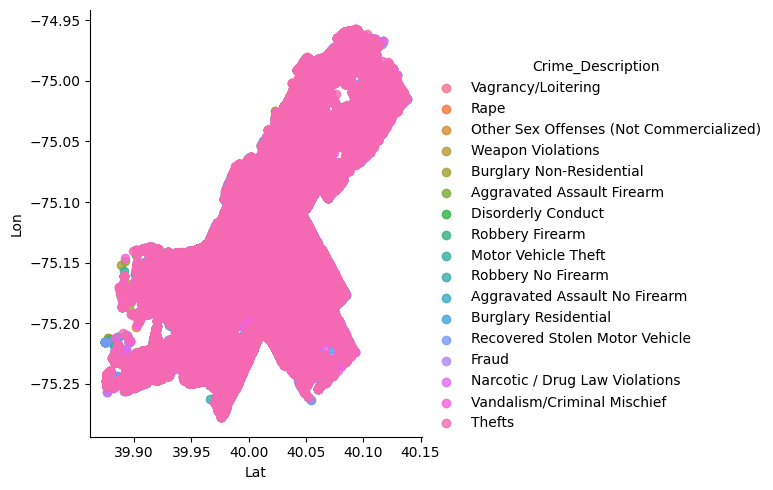

In [35]:
sea.lmplot(data=crimes, x='Lat',y='Lon', hue='Crime_Description', palette= 'husl'\
           ,fit_reg=False,hue_order=x)

In [ ]:
#Q1: Which year saw the most rapes? Which month of that year saw the most rapes?

In [44]:
rp = crimes.loc[crimes['Crime_Description']=='Rape']

In [45]:
rp.value_counts('Year')

Year
2015    1298
2013    1275
2014    1207
2016    1161
2007    1041
2008    1036
2006    1021
2009     913
2010     912
2012     890
2011     830
Name: count, dtype: int64

In [ ]:
#rape['Year'].value_counts().sort_index().plot(kind='bar')
# The most rapes occured in 2015

In [49]:
rpe2015 = rp.query('Year == 2015')

#Next step is to determine in which month did the most rapes occur

rpe2015['Month'].value_counts()
#The most rapes occured in the month of July (7)

Month
7     124
5     123
4     118
3     115
8     115
6     114
11    111
9     110
1     100
12     98
2      86
10     84
Name: count, dtype: int64

In [47]:
amt_rpe = rpe2015['Month'].value_counts().tolist()[0] #to get the actual amount of rapes that occured in July
month_rpe = rpe2015['Month'].value_counts().index[0] 

In [48]:
f'In 2015, the month with the most rapes occured in the {month_rpe}th month with a total of {amt_rpe} rapes.'

'In 2015, the month with the most rapes occured in the 7th month with a total of 124 rapes.'

In [37]:
# Q2: Over the span of all the years (2006-2016), which police district saw the most homicides?
#ignore NaNs : na=false
#homicide: criminal, justifiable, gross negligence
homi = crimes[crimes['Crime_Description'].str.contains('^Hom.*',na=False)]
homi

,Dc_Dist,Dispatch_Date,Dispatch_Time,Hour,Location_of_Crime,Crime_Description,Month,Lon,Lat,Year
1360,15,2014-04-09,23:45:00,23,5000 BLOCK F ST,Homicide - Criminal,4,-75.109796,40.025738,2014
45598,23,2009-01-24,03:22:00,3,1700 BLOCK N 24TH ST,Homicide - Criminal,1,-75.174150,39.980802,2009
45720,23,2009-02-23,22:51:00,22,1300 BLOCK N 10TH ST,Homicide - Criminal,2,-75.152084,39.973097,2009
45721,23,2009-02-24,01:51:00,1,1300 BLOCK N 10TH ST,Homicide - Criminal,2,-75.152084,39.973097,2009
45722,24,2009-01-08,15:04:00,15,1800 BLOCK HART LANE ST,Homicide - Criminal,1,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...
2146974,15,2016-11-28,21:01:00,21,2900 BLOCK DEVEREAUX AVE,Homicide - Criminal,11,-75.065621,40.029019,2016
2148631,14,2016-12-27,12:31:00,12,800 BLOCK W WALNUT LA,Homicide - Criminal,12,-75.195278,40.032753,2016
2149833,7,2016-11-19,21:47:00,21,13500 BLOCK BUSTLETON AVE,Homicide - Criminal,11,-75.013869,40.129004,2016
2150692,24,2016-12-19,01:39:00,1,1800 BLOCK E CLEMENTINE ST,Homicide - Criminal,12,-75.114421,39.995054,2016


In [38]:
homi['Crime_Description'].value_counts()

Crime_Description
Homicide - Criminal            3356
Homicide - Justifiable           41
Homicide - Gross Negligence       9
Name: count, dtype: int64

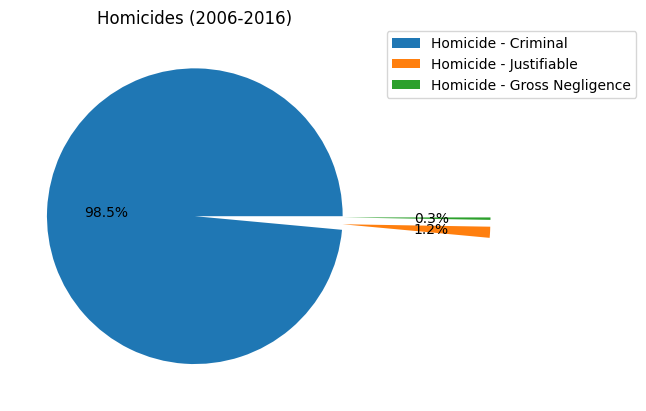

In [39]:
explode = [0, 1, 1]
hom = homi['Crime_Description'].value_counts()\
.plot(kind='pie', title='Homicides (2006-2016)', legend=True,
      autopct='%1.1f%%', explode=explode, labeldistance= None)
hom.set_ylabel('')
hom.legend(bbox_to_anchor=(1, 1.02),loc='upper left')


Text(0, 0.5, 'Police Districts')

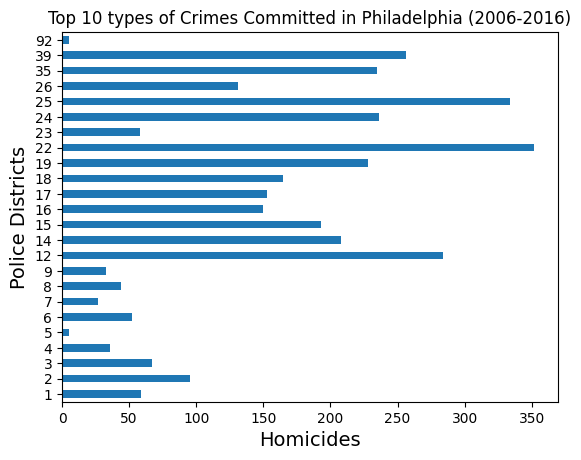

In [42]:
police_dist = homi['Dc_Dist'].value_counts().sort_index()\
.plot(kind='barh', title='Top 10 types of Crimes Committed in Philadelphia (2006-2016)')
police_dist.set_xlabel('Homicides', fontsize=14)
police_dist.set_ylabel('Police Districts', fontsize=14)